In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time,random;

In [14]:
experiment_25_file = "../src/build/csv/experiment-25-09-2025.csv"
df_experiment = pd.read_csv(experiment_25_file)
df_experiment["warmup_duration"] = df_experiment["warmup_duration"].apply(lambda x: [float(i) for i in x.split('|')])
df_experiment["repetitions_duration"] = df_experiment["repetitions_duration"].apply(lambda x: [float(i) for i in x.split('|')])
df_experiment['warmup_duration'] = df_experiment['warmup_duration'].apply(lambda x: [] if x == [0.0] else x)
df_exp_ref = df_experiment[df_experiment['version'].str.contains("Reference")]


In [15]:
df_exp_ref

,memcpy2D,memcpy2H,warmup_duration,repetitions_duration,warmups,repetitions,kernel,version
0,802.837463,0.038976,[],"[11.167744, 10.969088, 10.964992, 10.968064, 1...",0,400,FPC,ReferenceFPC2
1,869.153809,0.034592,[],"[11.137024, 10.975232, 10.970112, 10.970112, 1...",0,400,FPC,ReferenceFPC
5,802.564087,0.035712,[11.121664],"[10.974208, 10.97216, 10.974208, 10.966016, 10...",1,400,FPC,ReferenceFPC2
6,881.125366,0.039200,[11.13088],"[10.966016, 10.968064, 10.968064, 10.968064, 1...",1,400,FPC,ReferenceFPC
10,801.455078,0.035040,"[11.119616, 10.96704]","[10.971136, 10.970112, 10.962944, 10.969088, 1...",2,400,FPC,ReferenceFPC2
...,...,...,...,...,...,...,...,...
2611,9.613056,0.020864,"[14.7592, 14.706688, 13.325312, 11.936768, 11....","[11.917312, 11.9296, 11.910144, 11.91424, 11.9...",5,50,Accuracy,ReferenceAccuracy
2618,9.548928,0.031232,"[14.748544, 13.90592, 11.927552, 11.913216, 11...","[11.92448, 11.920384, 11.901952, 11.917312, 11...",5,125,Accuracy,ReferenceAccuracy
2625,9.429408,0.032064,"[14.737024, 13.750272, 11.889664, 11.923456, 1...","[11.89376, 11.937792, 11.906048, 11.912192, 11...",5,250,Accuracy,ReferenceAccuracy
2632,9.270560,0.031680,"[14.758624, 14.716928, 12.024832, 11.895808, 1...","[11.905024, 11.936768, 11.911168, 11.979776, 1...",5,500,Accuracy,ReferenceAccuracy


In [16]:
def boxplot_benchmark_warmup(df_one_ref,fixed_repetitions=400,version="",ax=None):
    warmup_df = df_one_ref[['warmups','repetitions','warmup_duration']].explode('warmup_duration')
    warmup_df = warmup_df.rename(columns={'warmup_duration': 'duration'})
    warmup_df["type"] = "warmups"
    
    repetitions_df = df_one_ref[['warmups','repetitions','repetitions_duration']].explode('repetitions_duration')
    repetitions_df = repetitions_df.rename(columns={'repetitions_duration': 'duration'})
    repetitions_df["type"] = "repetitions"
    long_df = pd.concat([warmup_df, repetitions_df], ignore_index=True)
    long_df.dropna(inplace=True)
    long_df = long_df[long_df["repetitions"]==fixed_repetitions]
    if ax is None:
        plt.figure(figsize=(8,8))
        sns.boxplot(long_df, x="warmups",y="duration",hue="type",fill=False)
        plt.title(f"Benchmarking of wamup for version {version}")
        plt.xlabel("Number of Warmup executions")
        plt.ylabel("Duration of a kernel (ms)")
    else:
        sns.boxplot(long_df, x="warmups",y="duration",hue="type",fill=False,ax=ax)
        ax.set_title(f"Benchmarking of wamup for version {version}")
        ax.set_xlabel("Number of Warmup executions")
        ax.set_ylabel("Duration of a kernel (ms)")
   

In [17]:
def boxplot_benchmark_repetitions(df_one_ref,fixed_warmup=5,version="",ax=None):
    repetitions_df = df_one_ref[['warmups','repetitions','repetitions_duration']].explode('repetitions_duration')
    repetitions_df = repetitions_df.rename(columns={'repetitions_duration': 'duration'})
    repetitions_df.dropna(inplace=True)
    repetitions_df = repetitions_df[repetitions_df["warmups"]==fixed_warmup]
    if ax is None:
        plt.figure(figsize=(8,8))
        sns.boxplot(repetitions_df, x="repetitions",y="duration",fill=False)
        plt.title(f"Benchmarking of repetitions for version {version}")
        plt.xlabel("Number of repetitions")
        plt.ylabel("Duration of a kernel (ms)")
    else:
        sns.boxplot(repetitions_df, x="repetitions",y="duration",fill=False,ax=ax)
        ax.set_title(f"Benchmarking of repetitions for version {version}")
        ax.set_xlabel("Number of repetitions")
        ax.set_ylabel("Duration of a kernel (ms)")

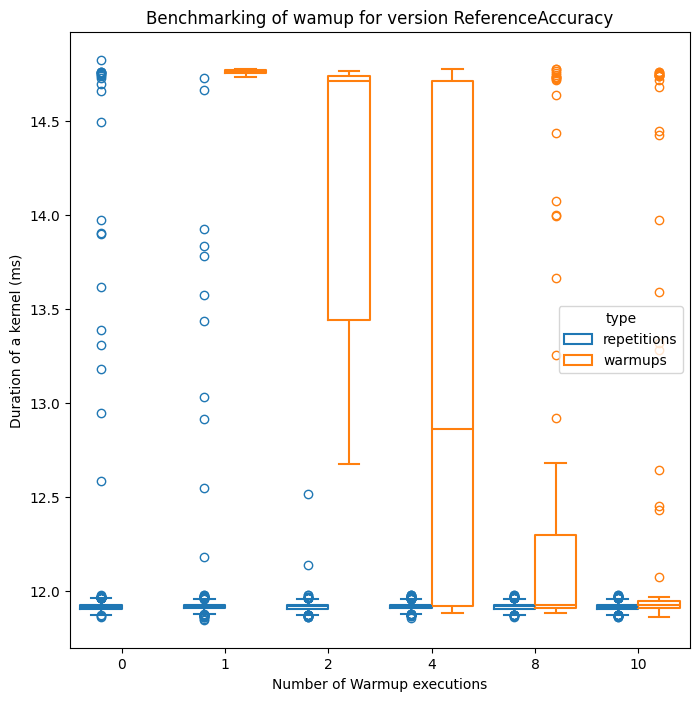

In [18]:
df = df_exp_ref[df_exp_ref["version"]=="ReferenceAccuracy"]
boxplot_benchmark_warmup(df,version="ReferenceAccuracy")

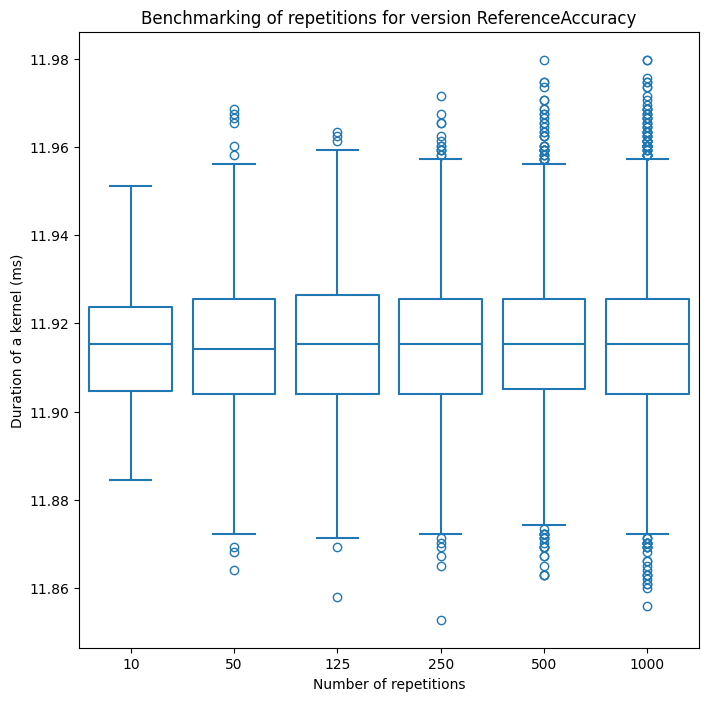

In [19]:
boxplot_benchmark_repetitions(df,version="ReferenceAccuracy")

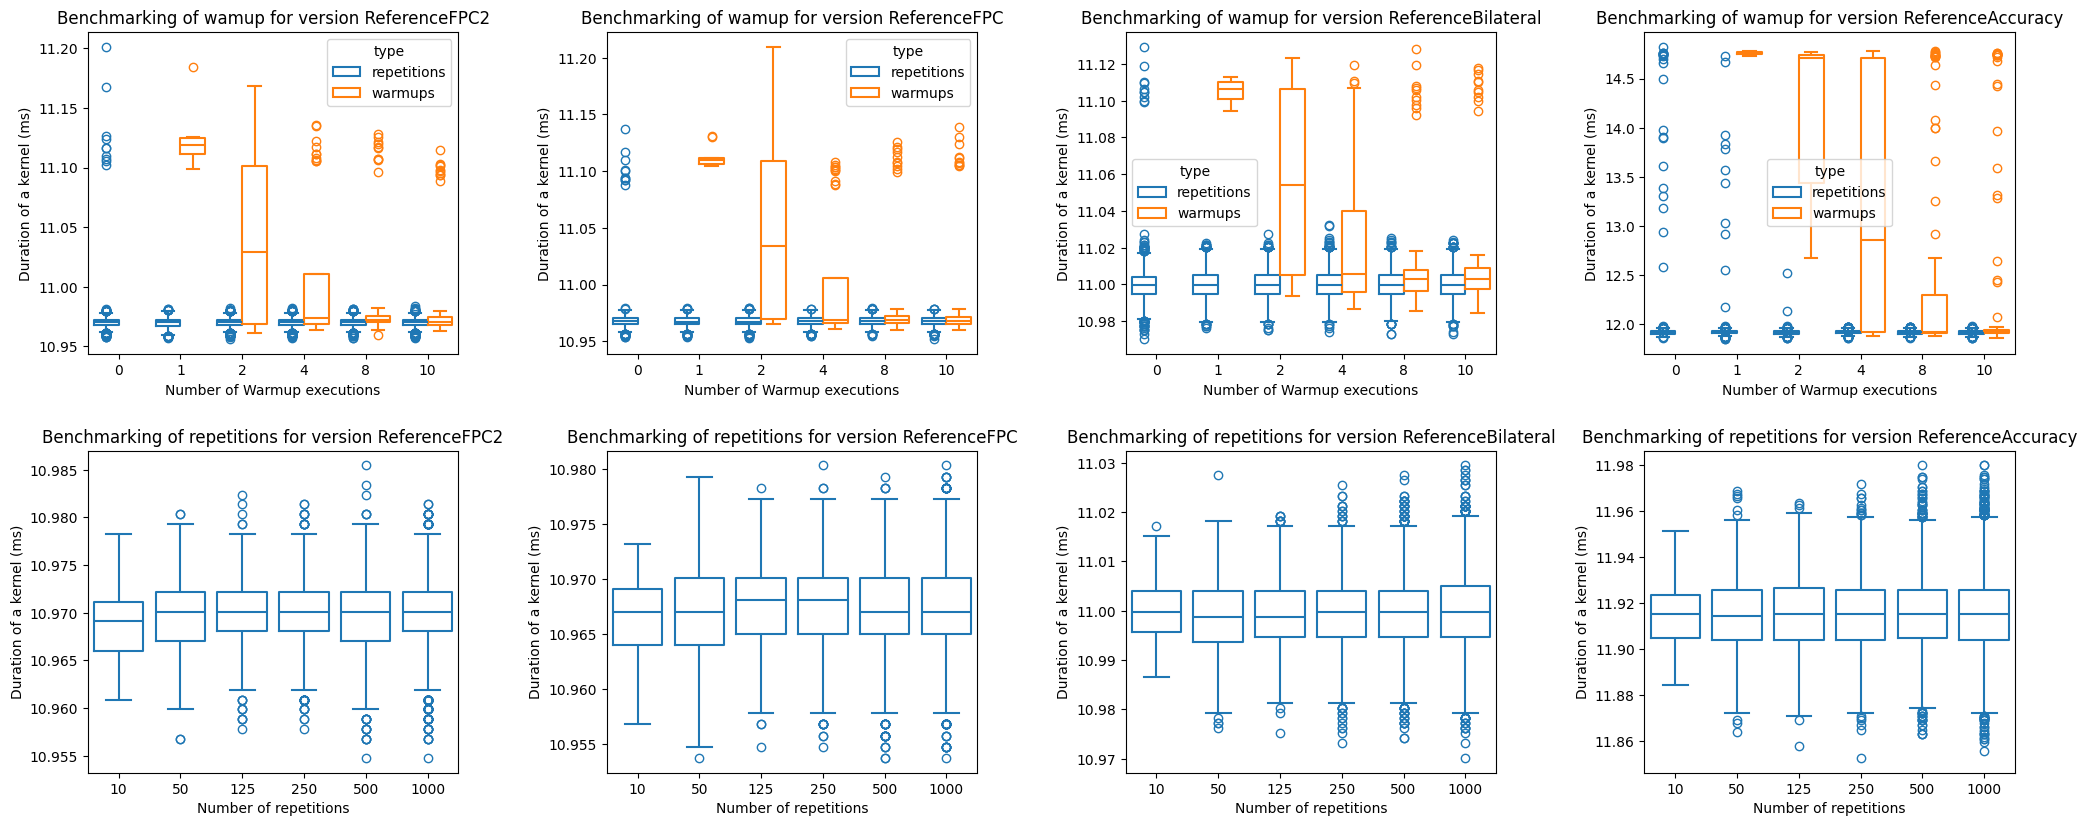

In [20]:
count = len(df_exp_ref["version"].unique())
fig, axes = plt.subplots(2, count, figsize=(5*count, 8))   # width grows with X
plt.tight_layout()   # pad = space (inches) around and between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.4)  # vertical & horizontal padding

curr = 0
for i in df_exp_ref["version"].unique():
    df = df_exp_ref[df_exp_ref["version"]==i]
    boxplot_benchmark_warmup(df,version=i,ax=axes[0][curr])
    boxplot_benchmark_repetitions(df,version=i,ax=axes[1][curr])
    curr+=1
plt.savefig(f"./figs/.svg", format="svg", bbox_inches="tight")